In [1]:
from model import Texture_model
from dataset import Texture_dataset_train, Texture_dataset_val
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
from sys import stdout
import time
import os
import matplotlib.pyplot as plt

In [2]:
model_path = '/fast_data/one_shot_texture_models/model_310.pt'
model = Texture_model()
model.load_state_dict(torch.load(model_path))
model.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Texture_model(
  (vgg): Vgg16(
    (features): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPool2d(kernel_size=2, stri

In [3]:
data = Texture_dataset_train(200, 'train_texture.npy')
data_ld = DataLoader(data, batch_size=8, num_workers=4)

In [10]:
for d, b in enumerate(data_ld):
    x, y, x_ref = b
    x, y, x_ref = x.to(device), y.to(device), x_ref.to(device)
    y_pred = model(x, x_ref)
    break

In [5]:
y_pred = y_pred.cpu().data.numpy()
x = np.swapaxes(x, 1, 2)
x = np.swapaxes(x, 2, 3)
x_ref = np.swapaxes(x_ref, 1, 2)
x_ref = np.swapaxes(x_ref, 2, 3)
y_pred.max(), y_pred.min(), y_pred.shape

(1.0, 1.0827142e-31, (8, 1, 256, 256))

In [6]:
x_ref.shape

torch.Size([8, 64, 64, 3])

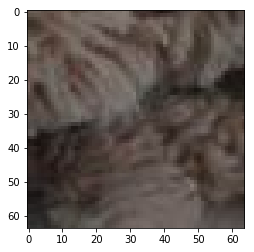

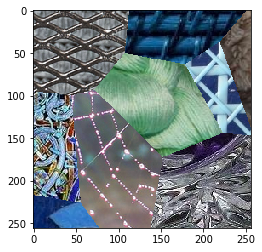

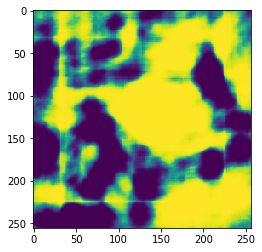

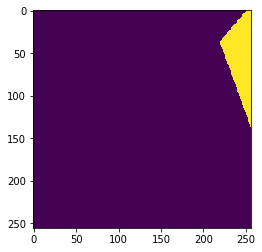

In [9]:
b = 2
plt.imshow(x_ref[b])
plt.show()
plt.imshow(x[b])
plt.show()
plt.imshow(y_pred[b][0])
plt.show()
plt.imshow(y[b][0])
plt.show()

In [26]:
test = torch.from_numpy(np.array([1.2, 2.9231, 3], dtype="float32"))
test1 = torch.from_numpy(np.array([2, 2, 2], dtype="float32"))

In [28]:
test2 = test + test1

In [30]:
test2 > 1

tensor([1, 1, 1], dtype=torch.uint8)